In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xlwings as xw

In [3]:
from functools import reduce

**скользящее среднее**

In [4]:
wb = xw.Book('к лекции 8.xlsx')

In [5]:
sheet1 = wb.sheets['Лист1']
arr = sheet1.range('B4:B14').options(np.array).value

In [6]:
arr.shape[0]

11

In [7]:
def moving_average(arr, n):
    m_a = []
    for i in range(int(arr.shape[0]-n+1)):
        m_a.append(np.mean(arr[i:i+n]))
    return m_a

In [8]:
moving_average(arr, 2)

[7900.0,
 8330.0,
 8330.0,
 8050.0,
 7750.0,
 7650.0,
 8000.0,
 8600.0,
 9130.0,
 9430.0]

In [9]:
moving_average(arr, 3)

[8086.666666666667,
 8286.666666666666,
 8186.666666666667,
 7900.0,
 7733.333333333333,
 7866.666666666667,
 8300.0,
 8853.333333333334,
 9253.333333333334]

In [10]:
moving_average(arr, 4)

[8115.0, 8190.0, 8040.0, 7850.0, 7875.0, 8125.0, 8565.0, 9015.0]

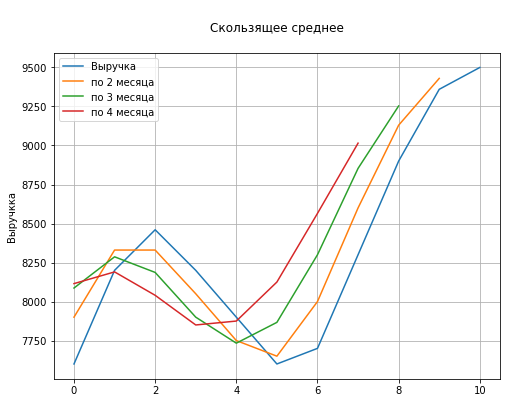

In [11]:
plt.title("\nСкользящее среднее\n")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.grid()
plt.ylabel('Выручкка')
plt.plot(arr, label='Выручка')
plt.plot(moving_average(arr, 2), label='по 2 месяца')
plt.plot(moving_average(arr, 3), label='по 3 месяца')
plt.plot(moving_average(arr, 4), label='по 4 месяца')
plt.legend()
plt.show()

**Абсолютное отклонение**

In [12]:
def absolute_deviation(arr, n, n1, moving_average_):
    a_d = []
    for i in range(n1-n, int(arr.shape[0] - n)):
        a_d.append(np.abs(arr[i + n] - moving_average_[i]))
    return a_d, np.mean(a_d)

In [13]:
reduce(sum, absolute_deviation(arr, 2, 4, moving_average(arr, 2)))

4125.714285714286

In [14]:
reduce(sum, absolute_deviation(arr, 3, 4,  moving_average(arr, 3)))

5119.999999999999

In [15]:
reduce(sum, absolute_deviation(arr, 4, 4, moving_average(arr, 4)))

5474.285714285714

**Относительное отклонение**

In [16]:
def relative_deviation(arr, n, n1, moving_average_):
    a_d = []
    for i in range(n1-n, int(arr.shape[0] - n)):
        a_d.append(np.abs(arr[i + n] - moving_average_[i]) / arr[i + n] * 100)
    return (a_d, np.mean(a_d))

In [17]:
# 2 мес
reduce(sum, relative_deviation(arr, 2,  4, moving_average(arr, 2)))

47.967452650449296

In [18]:
# 3 мес
reduce(sum, relative_deviation(arr, 3,  4, moving_average(arr, 3)))

59.17807498048988

In [19]:
# 4 мес
reduce(sum, relative_deviation(arr, 4,  4, moving_average(arr, 4)))

62.71468763981439

**Среднее квадратичное отклонение**

In [20]:
def standard_deviation(arr, n, n1, moving_average_):
    sumxmy2SUM = np.power(arr[n1:] - moving_average_[n1 - n:-1], 2).sum()
    return np.sqrt(sumxmy2SUM / arr[n1:].shape[0])

In [21]:
standard_deviation(arr, 2, 4, moving_average(arr, 2))

577.7913612566886

In [22]:
standard_deviation(arr, 3, 4, moving_average(arr, 3))

703.4969342562456

In [23]:
standard_deviation(arr, 4, 4, moving_average(arr, 4))

771.1308949477107

_лист 2_

In [24]:
sheet1 = wb.sheets['Лист2']
arr2 = sheet1.range('B2:B17').options(np.array).value
t = sheet1.range('A2:A17').options(np.array).value

In [25]:
arr2

array([ 6. ,  4.4,  5. ,  9. ,  7.2,  4.8,  6. , 10. ,  8. ,  5.6,  6.4,
       11. ,  9. ,  6.6,  7. , 10.8])

**скользящее среднее**

In [26]:
moving_average(arr2, 4)

[6.1,
 6.3999999999999995,
 6.5,
 6.75,
 7.0,
 7.2,
 7.4,
 7.5,
 7.75,
 8.0,
 8.25,
 8.4,
 8.350000000000001]

**Центрированная скользящая средняя**

In [27]:
def centered_moving_average(arr):
    return [np.mean(arr[i:i+2]) for i in range(len(arr)-1)]

In [28]:
centered_moving_average(moving_average(arr2, 4))

[6.25,
 6.449999999999999,
 6.625,
 6.875,
 7.1,
 7.300000000000001,
 7.45,
 7.625,
 7.875,
 8.125,
 8.325,
 8.375]

**Оценка сезонной компоненты**

In [29]:
osk = arr2[2:-2] - centered_moving_average(moving_average(arr2, 4))

In [30]:
ques = np.array([osk[2] + osk[6] + osk[10],
        osk[3] + osk[7] + osk[11],
        osk[0] + osk[4] + osk[8],
        osk[1] + osk[5] + osk[9]])

In [31]:
print(f'итого 1 кв за все годы: 1 - {ques[0]:.3f}, 2 - {ques[1]:.3f}, 3 - {ques[2]:.3f}, 4 - {ques[3]:.3f}')

итого 1 кв за все годы: 1 - 1.800, 2 - -5.875, 3 - -3.825, 4 - 8.125


In [32]:
print(f'средняя оценка СК I кв: 1 - {ques[0]/3:.3f}, 2 - {ques[1]/3:.3f}, 3 - {ques[2]/3:.3f}, 4 - {ques[3]/3:.3f}')

средняя оценка СК I кв: 1 - 0.600, 2 - -1.958, 3 - -1.275, 4 - 2.708


In [33]:
k = ques/3
k2 = k - k.mean()

In [34]:
k2

array([ 0.58125   , -1.97708333, -1.29375   ,  2.68958333])

## Аддитивная модель ##

**Расчет значений Т+Е и Т+S**

In [35]:
# T+E =Yt-St

T_E = arr2 - np.tile(k2,4)

In [36]:
T_E 

array([5.41875   , 6.37708333, 6.29375   , 6.31041667, 6.61875   ,
       6.77708333, 7.29375   , 7.31041667, 7.41875   , 7.57708333,
       7.69375   , 8.31041667, 8.41875   , 8.57708333, 8.29375   ,
       8.11041667])

In [37]:
def factors(x, y):
    b1 = ((x - x.mean()) * (y - y.mean())).sum()   / ((x - x.mean())**2).sum() 
    b0 = y.mean() - b1 * x.mean()
    return b0, b1

In [38]:
def r_qr(x, y, b0, b1):
    yi = b0 + b1 * x
    ss_res = sum((yi - y.mean())**2)
    ss_tot = sum((yi - y.mean())**2) + sum((y - y.mean())**2)
    r2 = ss_res / ss_tot
    print(ss_res)
    print(ss_tot)
    return r2

In [39]:
x = t
y = T_E 

bs_0 = factors(x, y)

print(f'T = B0+B1t по скольз: b0 = {bs_0[0]}, b1 = {bs_0[1]}; r2 = {r_qr(x, y, bs_0[0], bs_0[1])}')

11.816020424836605
24.730117647058826
T = B0+B1t по скольз: b0 = 5.715416666666667, b1 = 0.186421568627451; r2 = 0.4777987955201618


In [40]:
y = arr2
x = t

bs_1 = factors(x, y)

print(f'T = B0+B1t по данным: b0 = {bs_1[0]}, b1 = {bs_1[1]}; r2 = {r_qr(x, y, bs_1[0], bs_1[1])}')

17.61988235294118
84.73988235294118
T = B0+B1t по данным: b0 = 5.364999999999998, b1 = 0.22764705882352942; r2 = 0.20792903959382972


_T скольз_

In [43]:
t

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [44]:
bs_0

(5.715416666666667, 0.186421568627451)

In [42]:
moving_t = bs_0[0] + bs_0[1]*t
moving_t

array([5.90183824, 6.0882598 , 6.27468137, 6.46110294, 6.64752451,
       6.83394608, 7.02036765, 7.20678922, 7.39321078, 7.57963235,
       7.76605392, 7.95247549, 8.13889706, 8.32531863, 8.5117402 ,
       8.69816176])

In [41]:
T_S =  moving_t + np.tile(k2, 4)

In [42]:
T_S

array([ 6.48308824,  4.11117647,  4.98093137,  9.15068627,  7.22877451,
        4.85686275,  5.72661765,  9.89637255,  7.97446078,  5.60254902,
        6.47230392, 10.64205882,  8.72014706,  6.34823529,  7.2179902 ,
       11.3877451 ])

_E^2_

In [43]:
E_2 = np.power(arr2 - (np.tile(k2, 4) + moving_t), 2)
E_2

array([2.33374243e-01, 8.34190311e-02, 3.63612553e-04, 2.27063533e-02,
       8.27972414e-04, 3.23337178e-03, 7.47379109e-02, 1.07386486e-02,
       6.52251538e-04, 6.49750096e-06, 5.22785707e-03, 1.28121886e-01,
       7.83176687e-02, 6.33854671e-02, 4.75197256e-02, 3.45444300e-01])

_Т без сколь_

In [44]:
t_ = bs_1[0] + bs_1[1]*t
t_

array([5.59264706, 5.82029412, 6.04794118, 6.27558824, 6.50323529,
       6.73088235, 6.95852941, 7.18617647, 7.41382353, 7.64147059,
       7.86911765, 8.09676471, 8.32441176, 8.55205882, 8.77970588,
       9.00735294])

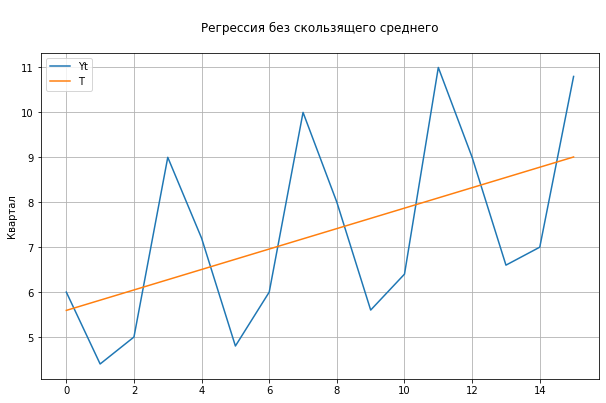

In [45]:
plt.title("\nРегрессия без скользящего среднего\n")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.grid()
plt.ylabel('Квартал')
plt.plot(arr2, label='Yt')
plt.plot(t_, label='Т')
plt.legend()
plt.show()

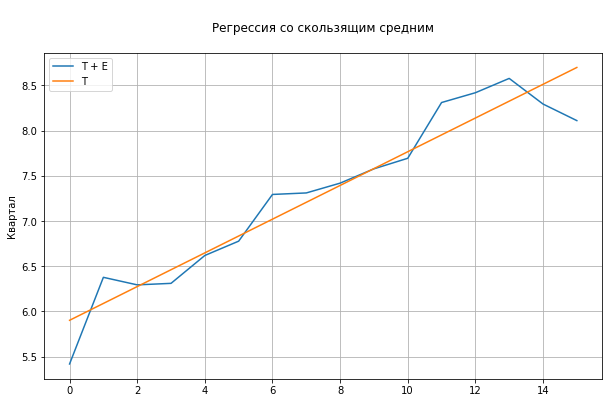

In [46]:
plt.title("\nРегрессия со скользящим средним\n")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.grid()
plt.ylabel('Квартал')
plt.plot(T_E , label='Т + E')
plt.plot(moving_t, label='Т')
plt.legend()
plt.show()